# 毕业论文`GRAD`
## 绘制珠三角长时间尺度上的污染物浓度变化

---
*@author: Evan*\
*@date: 2023-12-21*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'NO2' # ['O3','NO2','PM2.5','AQI','O3_8h']

datapath = obs_dir + 'allTime_full/'
df = pd.read_excel(datapath + f'site_{var}.xlsx',index_col=0)
df

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,3447A,3448A,3449A,3451A,3452A,3454A,3623A,3625A,3626A,3627A
datetime,,,,,,,,,,,,,,,,,,,,,
2014-05-13 00:00:00,56.0,87.0,84.0,54.0,68.0,75.0,30.0,68.0,103.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13 01:00:00,52.0,87.0,84.0,54.0,77.0,75.0,26.0,64.0,55.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13 02:00:00,47.0,81.0,78.0,53.0,73.0,64.0,31.0,53.0,71.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13 03:00:00,46.0,75.0,73.0,55.0,70.0,50.0,32.0,45.0,42.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13 04:00:00,41.0,80.0,76.0,56.0,72.0,56.0,31.0,45.0,81.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16 19:00:00,22.0,14.0,NaN,16.0,15.0,25.0,17.0,22.0,10.0,16.0,...,14.0,32.0,30.0,15.0,10.0,27.0,23.0,25.0,13.0,17.0
2023-12-16 20:00:00,20.0,14.0,NaN,13.0,15.0,24.0,16.0,24.0,10.0,17.0,...,14.0,28.0,26.0,15.0,9.0,28.0,22.0,22.0,11.0,16.0
2023-12-16 21:00:00,21.0,15.0,NaN,12.0,14.0,22.0,15.0,28.0,11.0,22.0,...,14.0,26.0,24.0,14.0,8.0,26.0,21.0,22.0,11.0,16.0


In [3]:
# calculate average
hourly = df.mean(axis=1,skipna=True)
# fill the time index
hourly = hourly.reindex(pd.date_range(df.index[0],df.index[-1],freq='H'))

empty_rows = df[df.isnull().all(axis=1)].index
print(f'原有空值行共{empty_rows.shape[0]}行')
empty_rows = hourly[hourly.isnull()].index
print(f'填充后共有{empty_rows.shape[0]}行')

原有空值行共194行
填充后共有2373行


In [4]:
# fill nan with linear method
filled = hourly.interpolate(method='linear')

In [5]:
# calculate MDA8
# daily = filled.rolling(8).mean().resample('D').max()
# calculate average
daily = filled.resample('D').mean()

# month
monthly = daily.resample('M').mean()
month_max = daily.resample('M').max()
month_min = daily.resample('M').min()

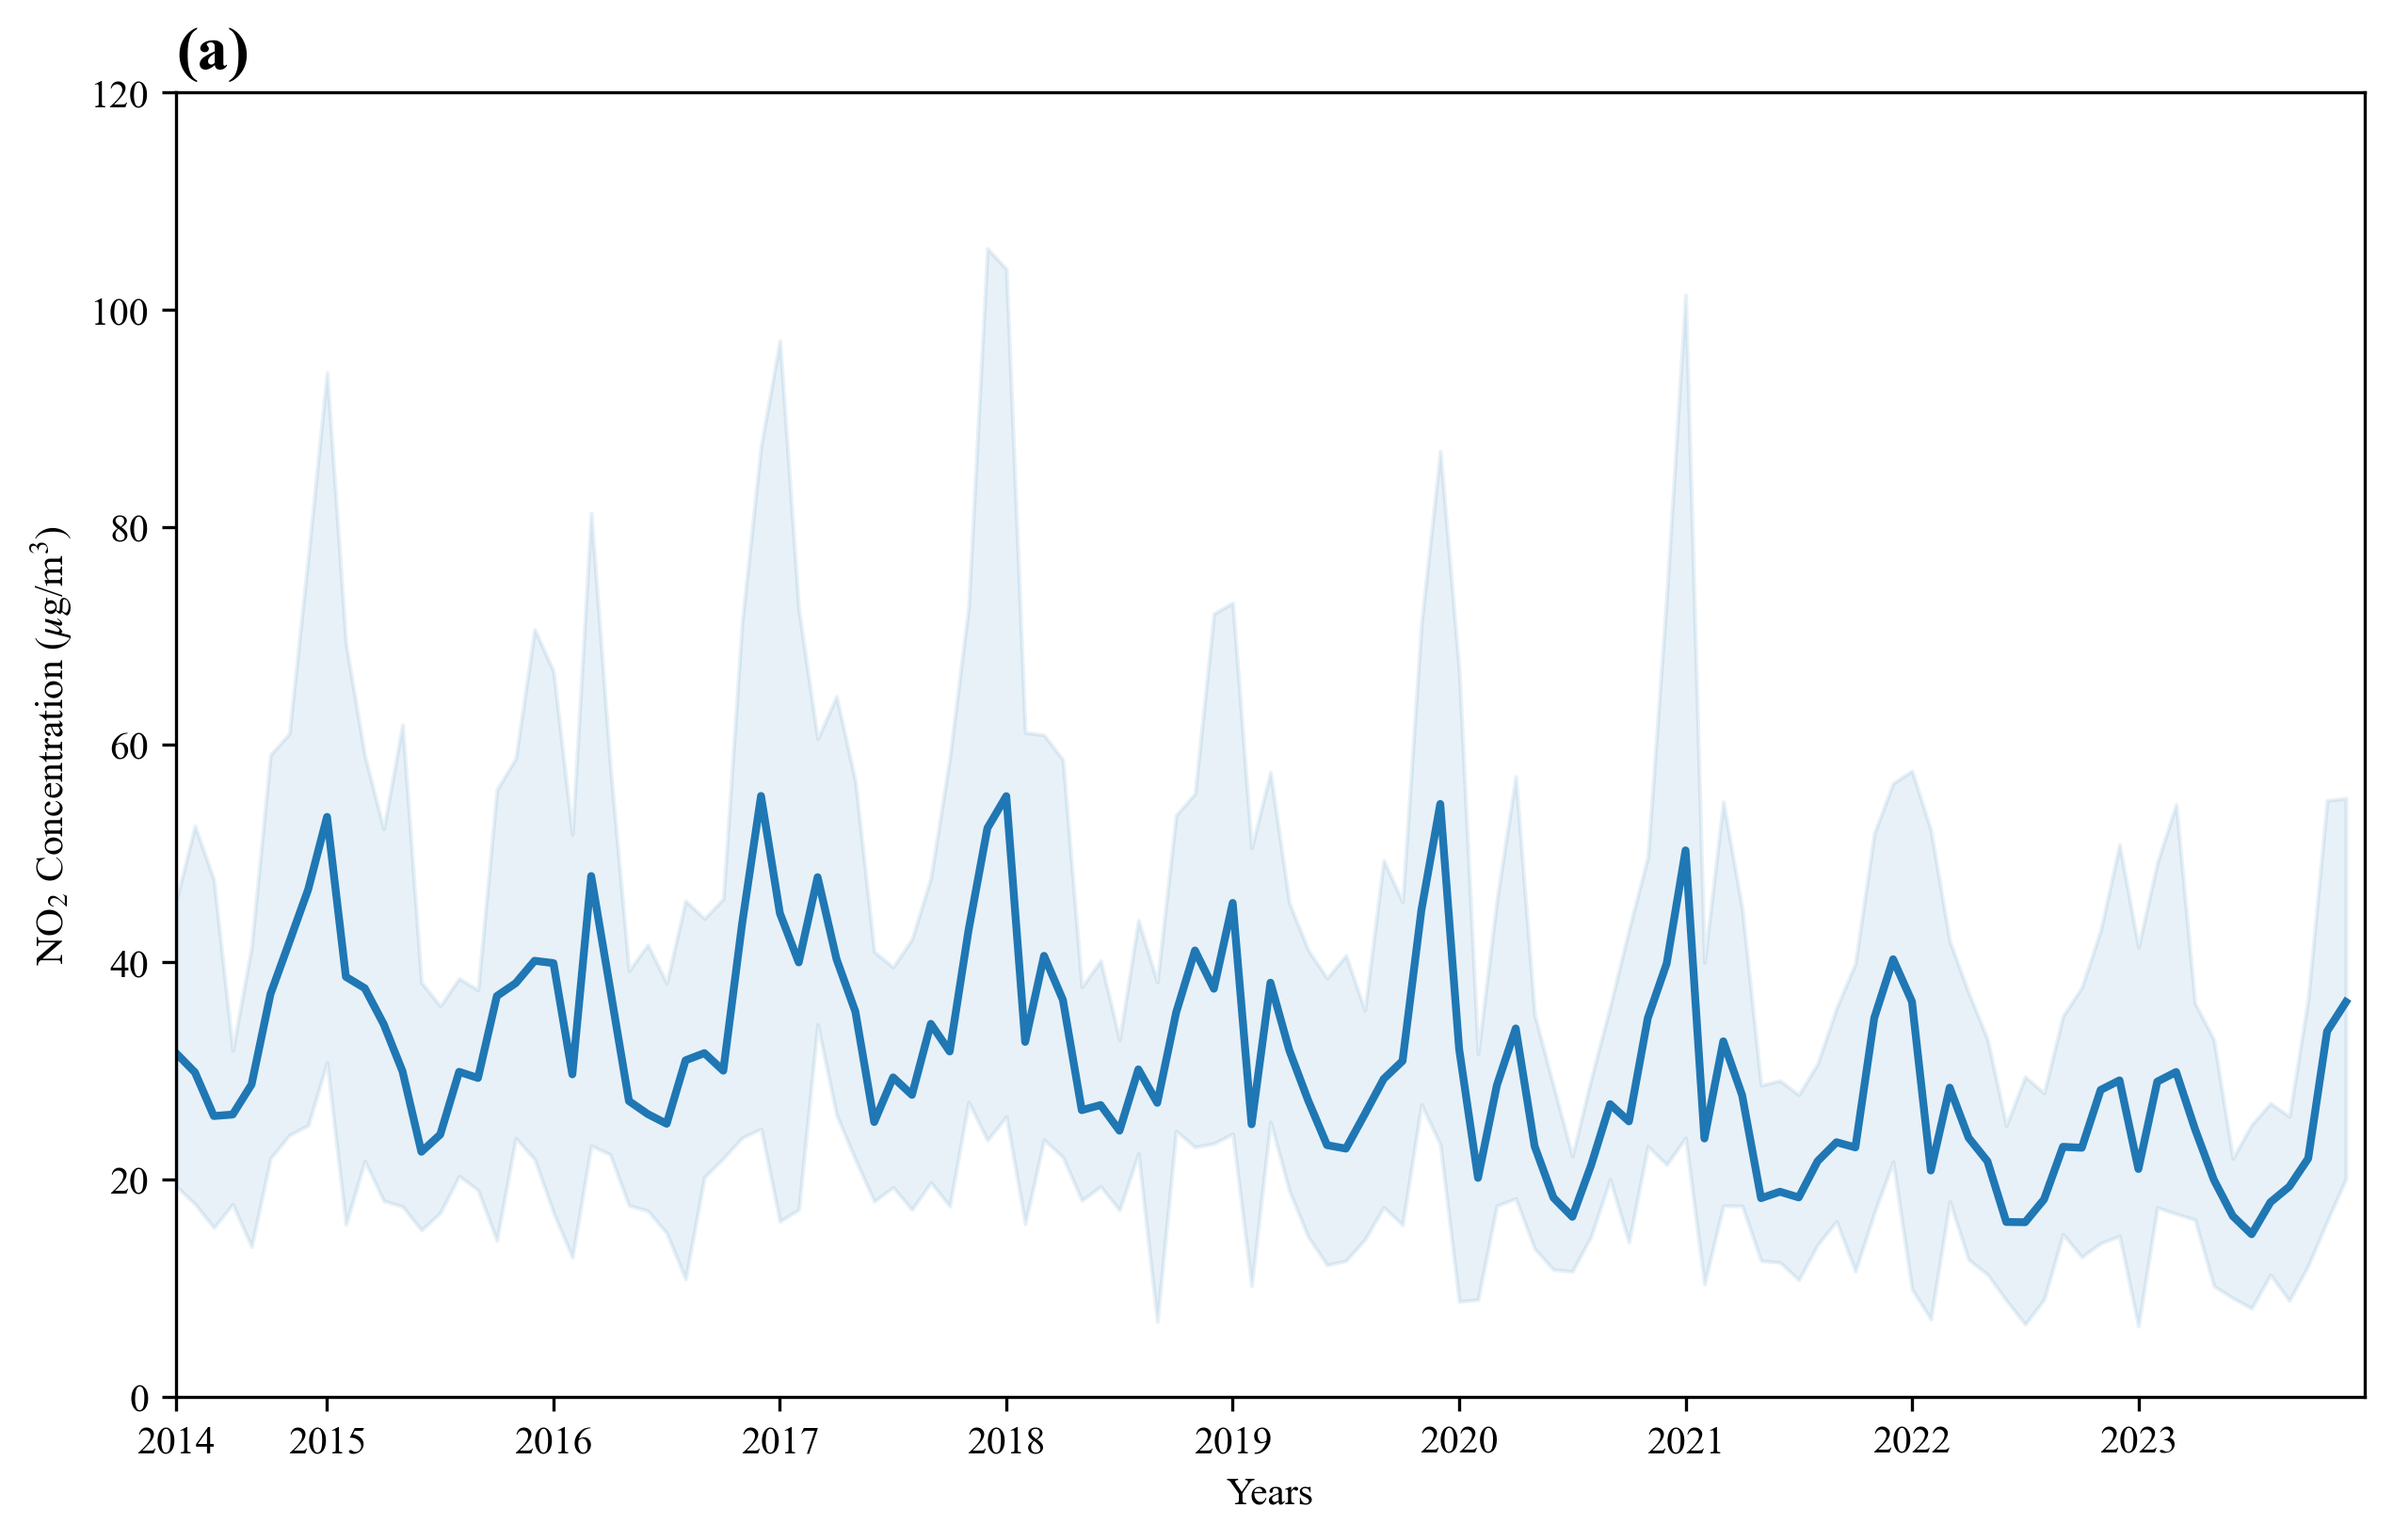

In [7]:
textdict = {'weight': 'bold', 'size': 16,}

fig = plt.figure(figsize=(10, 6),dpi=300)
ax = fig.subplots(1,1)

monthnum = len(pd.date_range(df.index[0],df.index[-1],freq='M'))+1
months = np.arange(0,monthnum)

ax.plot(months,monthly,label='Monthly',color='tab:blue',linewidth=2)
ax.fill_between(months,month_min,month_max,alpha=0.1,color='tab:blue')

ax.set_xticks(np.array([0,8,20,32,44,56,68,80,92,104,]))
ax.set_xticklabels(pd.date_range('2014','2024',freq='Y').strftime('%Y'),rotation=0)

ax.set_xlim(0,monthnum)
ax.set_ylim(0,120)
ax.set_xlabel('Years')
ax.set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax.set_title('(a)',loc='left',**textdict)

plt.show()

## 添加趋势线

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(months,monthly)
print(f'y = {slope:.2f} * x + {intercept:.2f}')

y = -0.12 * x + 38.19


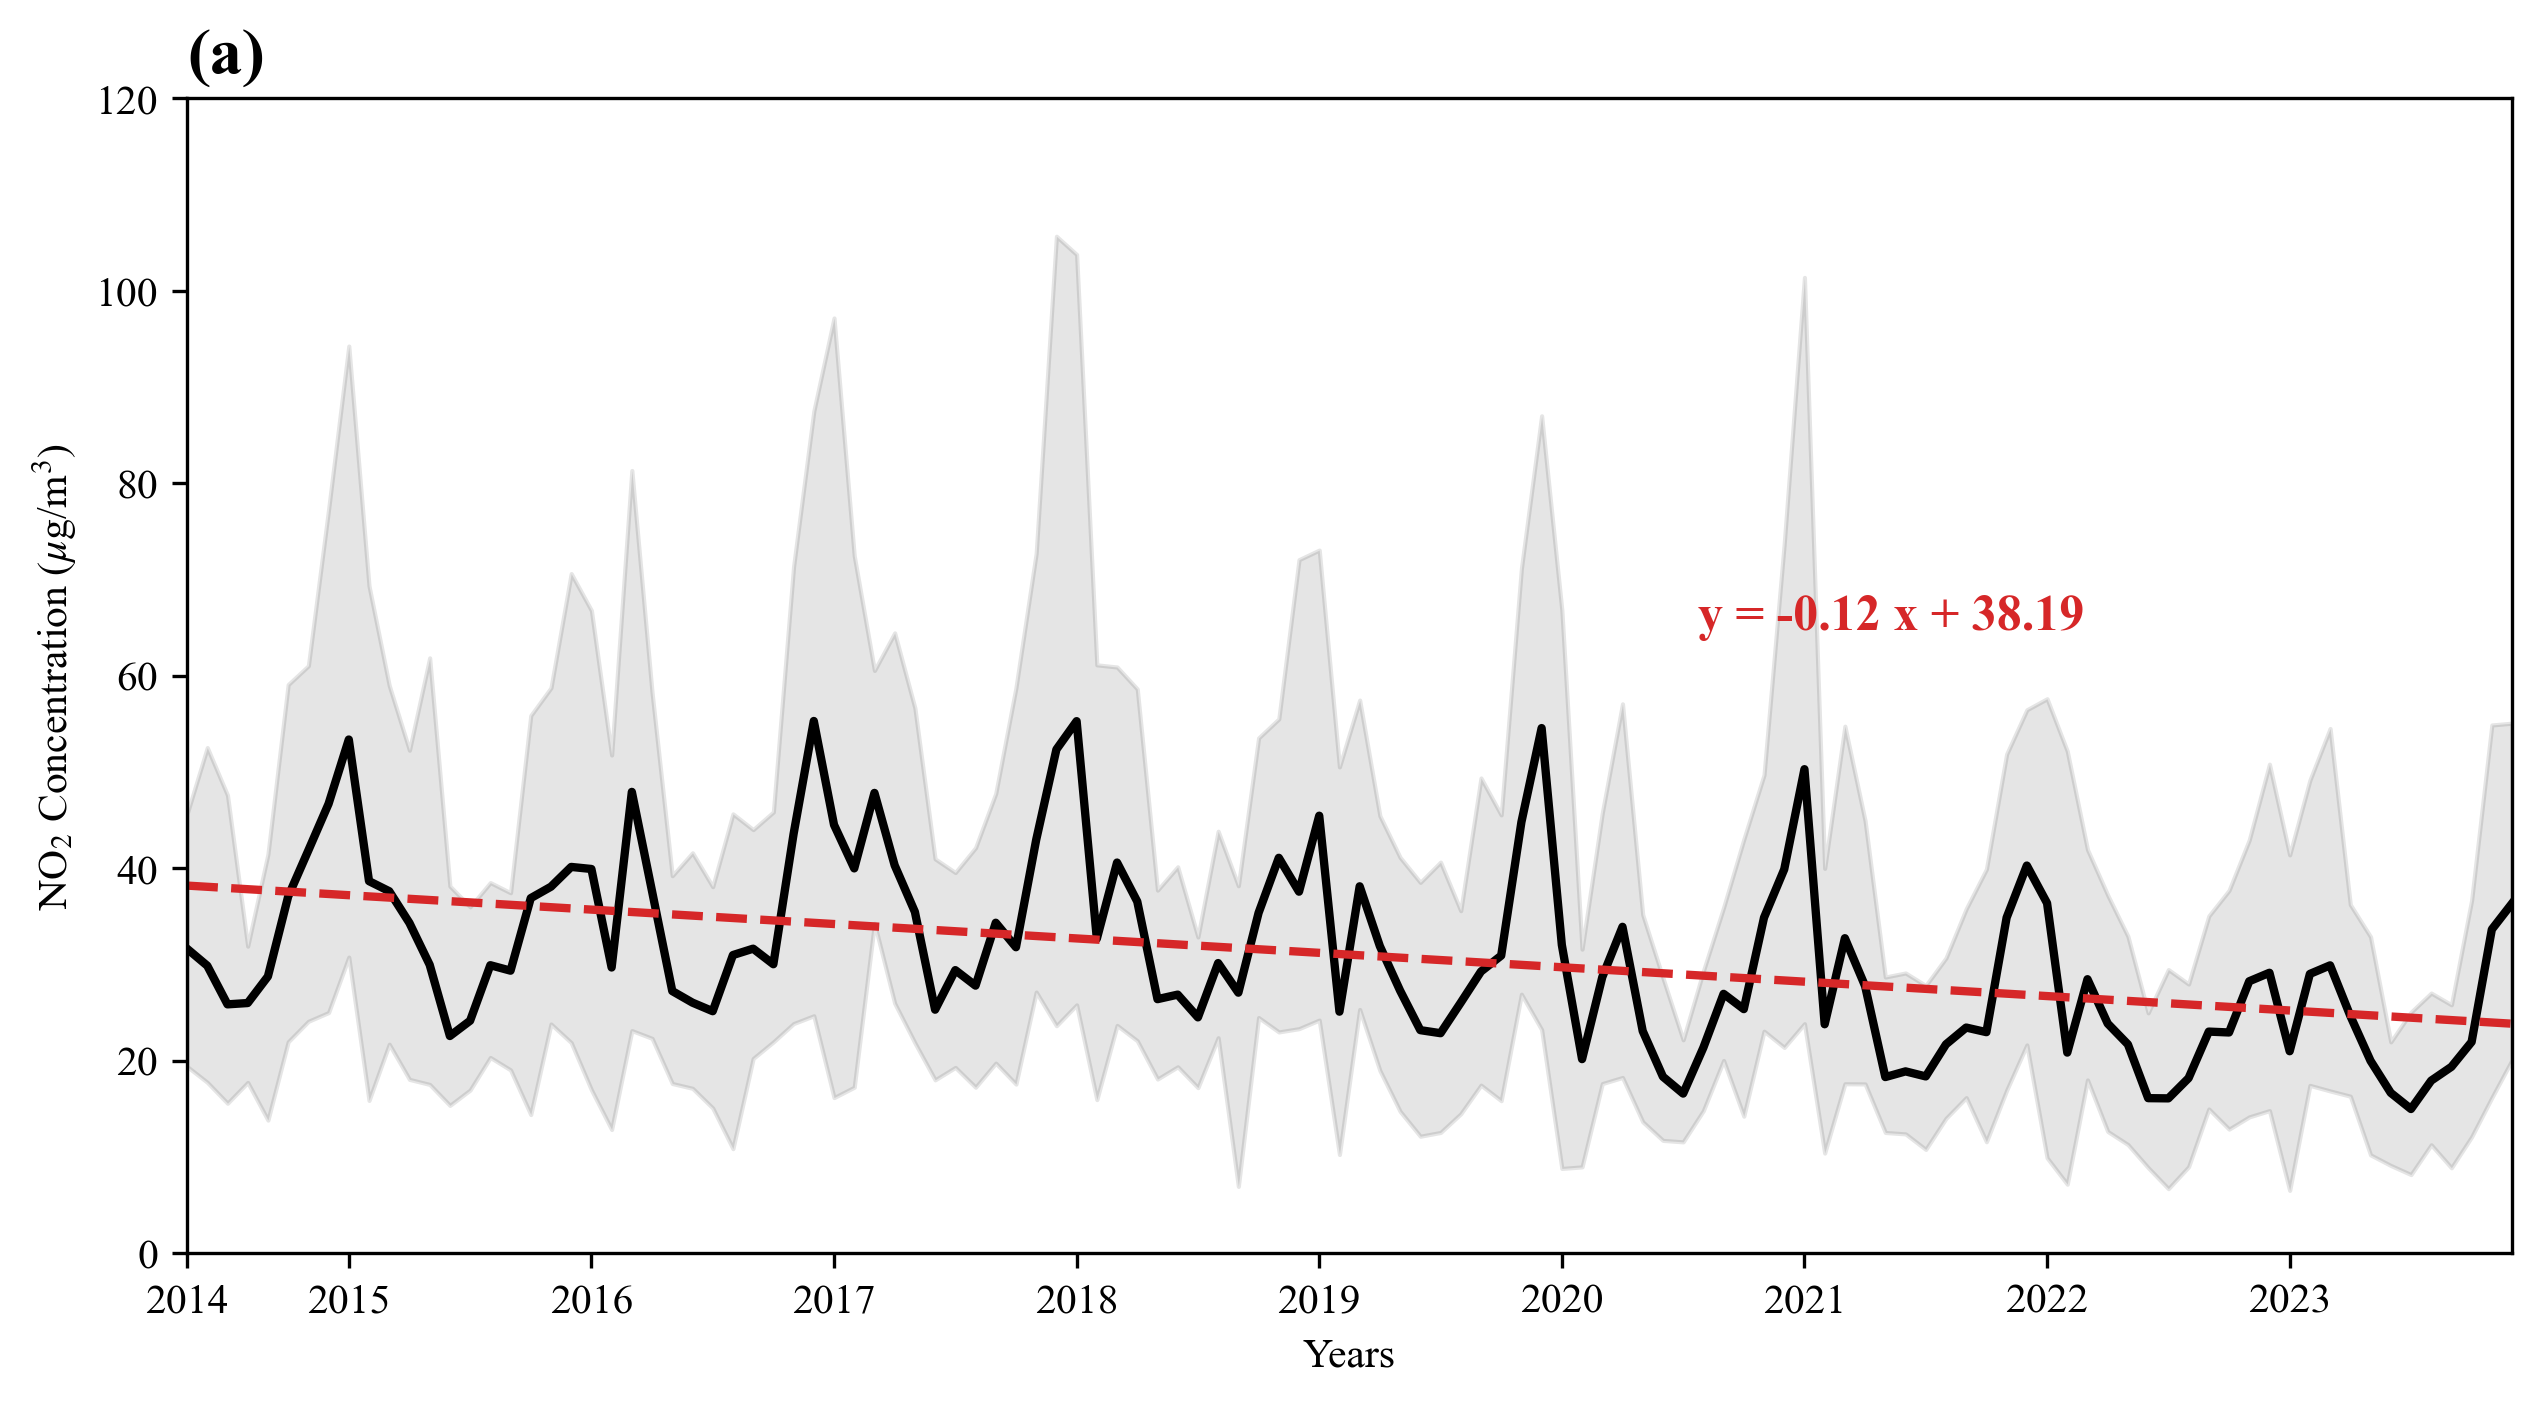

In [9]:
textdict = {'weight': 'bold', 'size': 16,}

fig = plt.figure(figsize=(10, 5),dpi=300)
ax = fig.subplots(1,1)

monthnum = len(pd.date_range(df.index[0],df.index[-1],freq='M'))+1
months = np.arange(0,monthnum)

ax.plot(months,monthly,label='Monthly',color='k',linewidth=2)
ax.fill_between(months,month_min,month_max,alpha=0.1,color='k')

ax.plot(months,months*slope+intercept,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax.text(x=0.65,y=0.54,s=f'y = {slope:.2f} x + {intercept:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax.transAxes)

ax.set_xticks(np.array([0,8,20,32,44,56,68,80,92,104,]))
ax.set_xticklabels(pd.date_range('2014','2024',freq='Y').strftime('%Y'),rotation=0)

ax.set_xlim(0,monthnum-1)
ax.set_ylim(0,120)
ax.set_xlabel('Years')
ax.set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax.set_title('(a)',loc='left',**textdict)

plt.show()

下面画各年夏季、秋季的时间序列，并从2019年前后分两段计算趋势

In [10]:
summer = monthly.loc[(monthly.index.month==6) | (monthly.index.month==7) | (monthly.index.month==8)]
autumn = monthly.loc[(monthly.index.month==9) | (monthly.index.month==10) | (monthly.index.month==11)]

In [11]:
summer_daily = daily.loc[daily.index.month.isin([6,7,8])]
autumn_daily = daily.loc[daily.index.month.isin([9,10,11])]

summer = summer_daily.resample('M').mean()
summer_max = summer_daily.resample('M').max()
summer_min = summer_daily.resample('M').min()

autumn = autumn_daily.resample('M').mean()
autumn_max = autumn_daily.resample('M').max()
autumn_min = autumn_daily.resample('M').min()

summer_index = summer.index.month.isin([6, 7, 8])
summer = summer[summer_index]
summer_max = summer_max[summer_index]
summer_min = summer_min[summer_index]

autumn_index = autumn.index.month.isin([9, 10, 11])
autumn = autumn[autumn_index]
autumn_max = autumn_max[autumn_index]
autumn_min = autumn_min[autumn_index]


In [12]:
seasonnum = len(summer.index)
seasons = np.arange(0,seasonnum)

slope1, intercept1, r_value, p_value, std_err = stats.linregress(seasons,summer)
print(f'Summer: y = {slope1:.2f} * x + {intercept1:.2f}')
slope2, intercept2, r_value, p_value, std_err = stats.linregress(seasons,autumn)
print(f'Autumn: y = {slope2:.2f} * x + {intercept2:.2f}')

Summer: y = -0.44 * x + 29.44
Autumn: y = -0.41 * x + 37.70


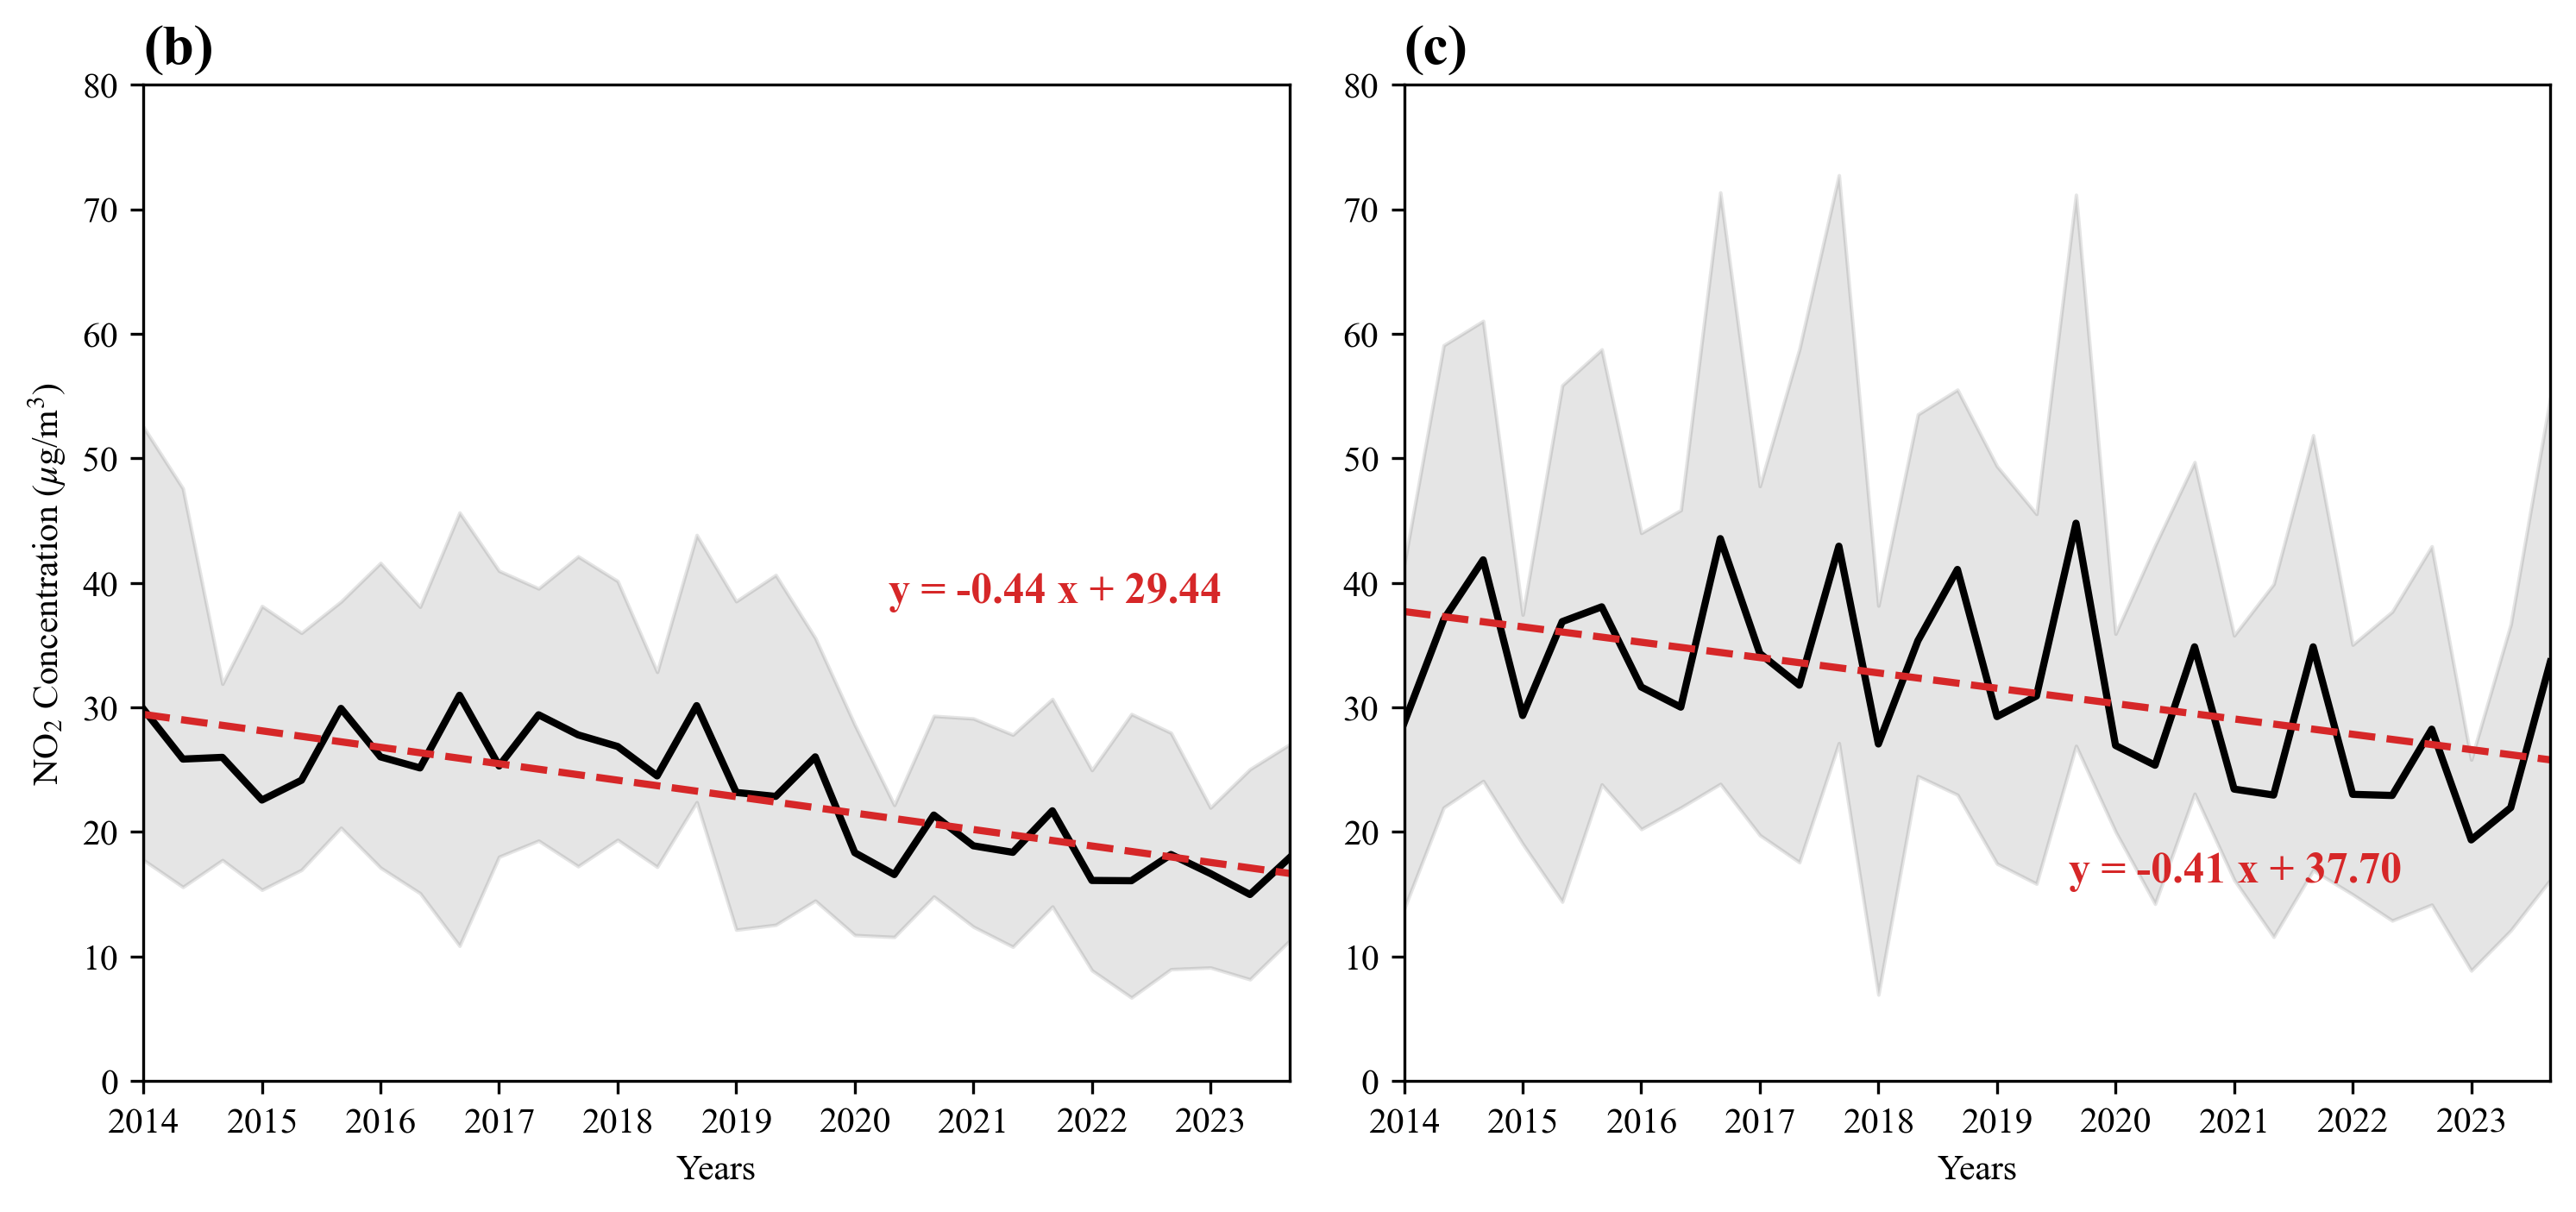

In [16]:
textdict = {'weight': 'bold', 'size': 16,}

fig = plt.figure(figsize=(12, 5),dpi=300)
ax = fig.subplots(1,2)

# ============ Summer ===============
ax[0].plot(seasons,summer,label='summer',color='k',linewidth=2)
ax[0].fill_between(seasons,summer_min,summer_max,alpha=0.1,color='k')

ax[0].set_xticks(np.arange(0,seasonnum,3))
ax[0].set_xticklabels(pd.date_range('2014','2024',freq='Y').strftime('%Y'),rotation=0)

ax[0].plot(seasons,seasons*slope1+intercept1,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax[0].text(x=0.65,y=0.48,s=f'y = {slope1:.2f} x + {intercept1:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax[0].transAxes)

ax[0].set_xlim(0,seasonnum-1)
ax[0].set_ylim(0,80)
ax[0].set_xlabel('Years')
ax[0].set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax[0].set_title('(b)',loc='left',**textdict)

# ============ Autumn ===============
ax[1].plot(seasons,autumn,label='autumn',color='k',linewidth=2)
ax[1].fill_between(seasons,autumn_min,autumn_max,alpha=0.1,color='k')

ax[1].plot(seasons,seasons*slope2+intercept2,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax[1].text(x=0.58,y=0.2,s=f'y = {slope2:.2f} x + {intercept2:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax[1].transAxes)

ax[1].set_xticks(np.arange(0,seasonnum,3))
ax[1].set_xticklabels(pd.date_range('2014','2024',freq='Y').strftime('%Y'),rotation=0)

ax[1].set_xlim(0,seasonnum-1)
ax[1].set_ylim(0,80)
ax[1].set_xlabel('Years')
# ax[1].set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax[1].set_title('(c)',loc='left',**textdict)

plt.subplots_adjust(wspace=0.1,)
plt.show()

## 合成子图

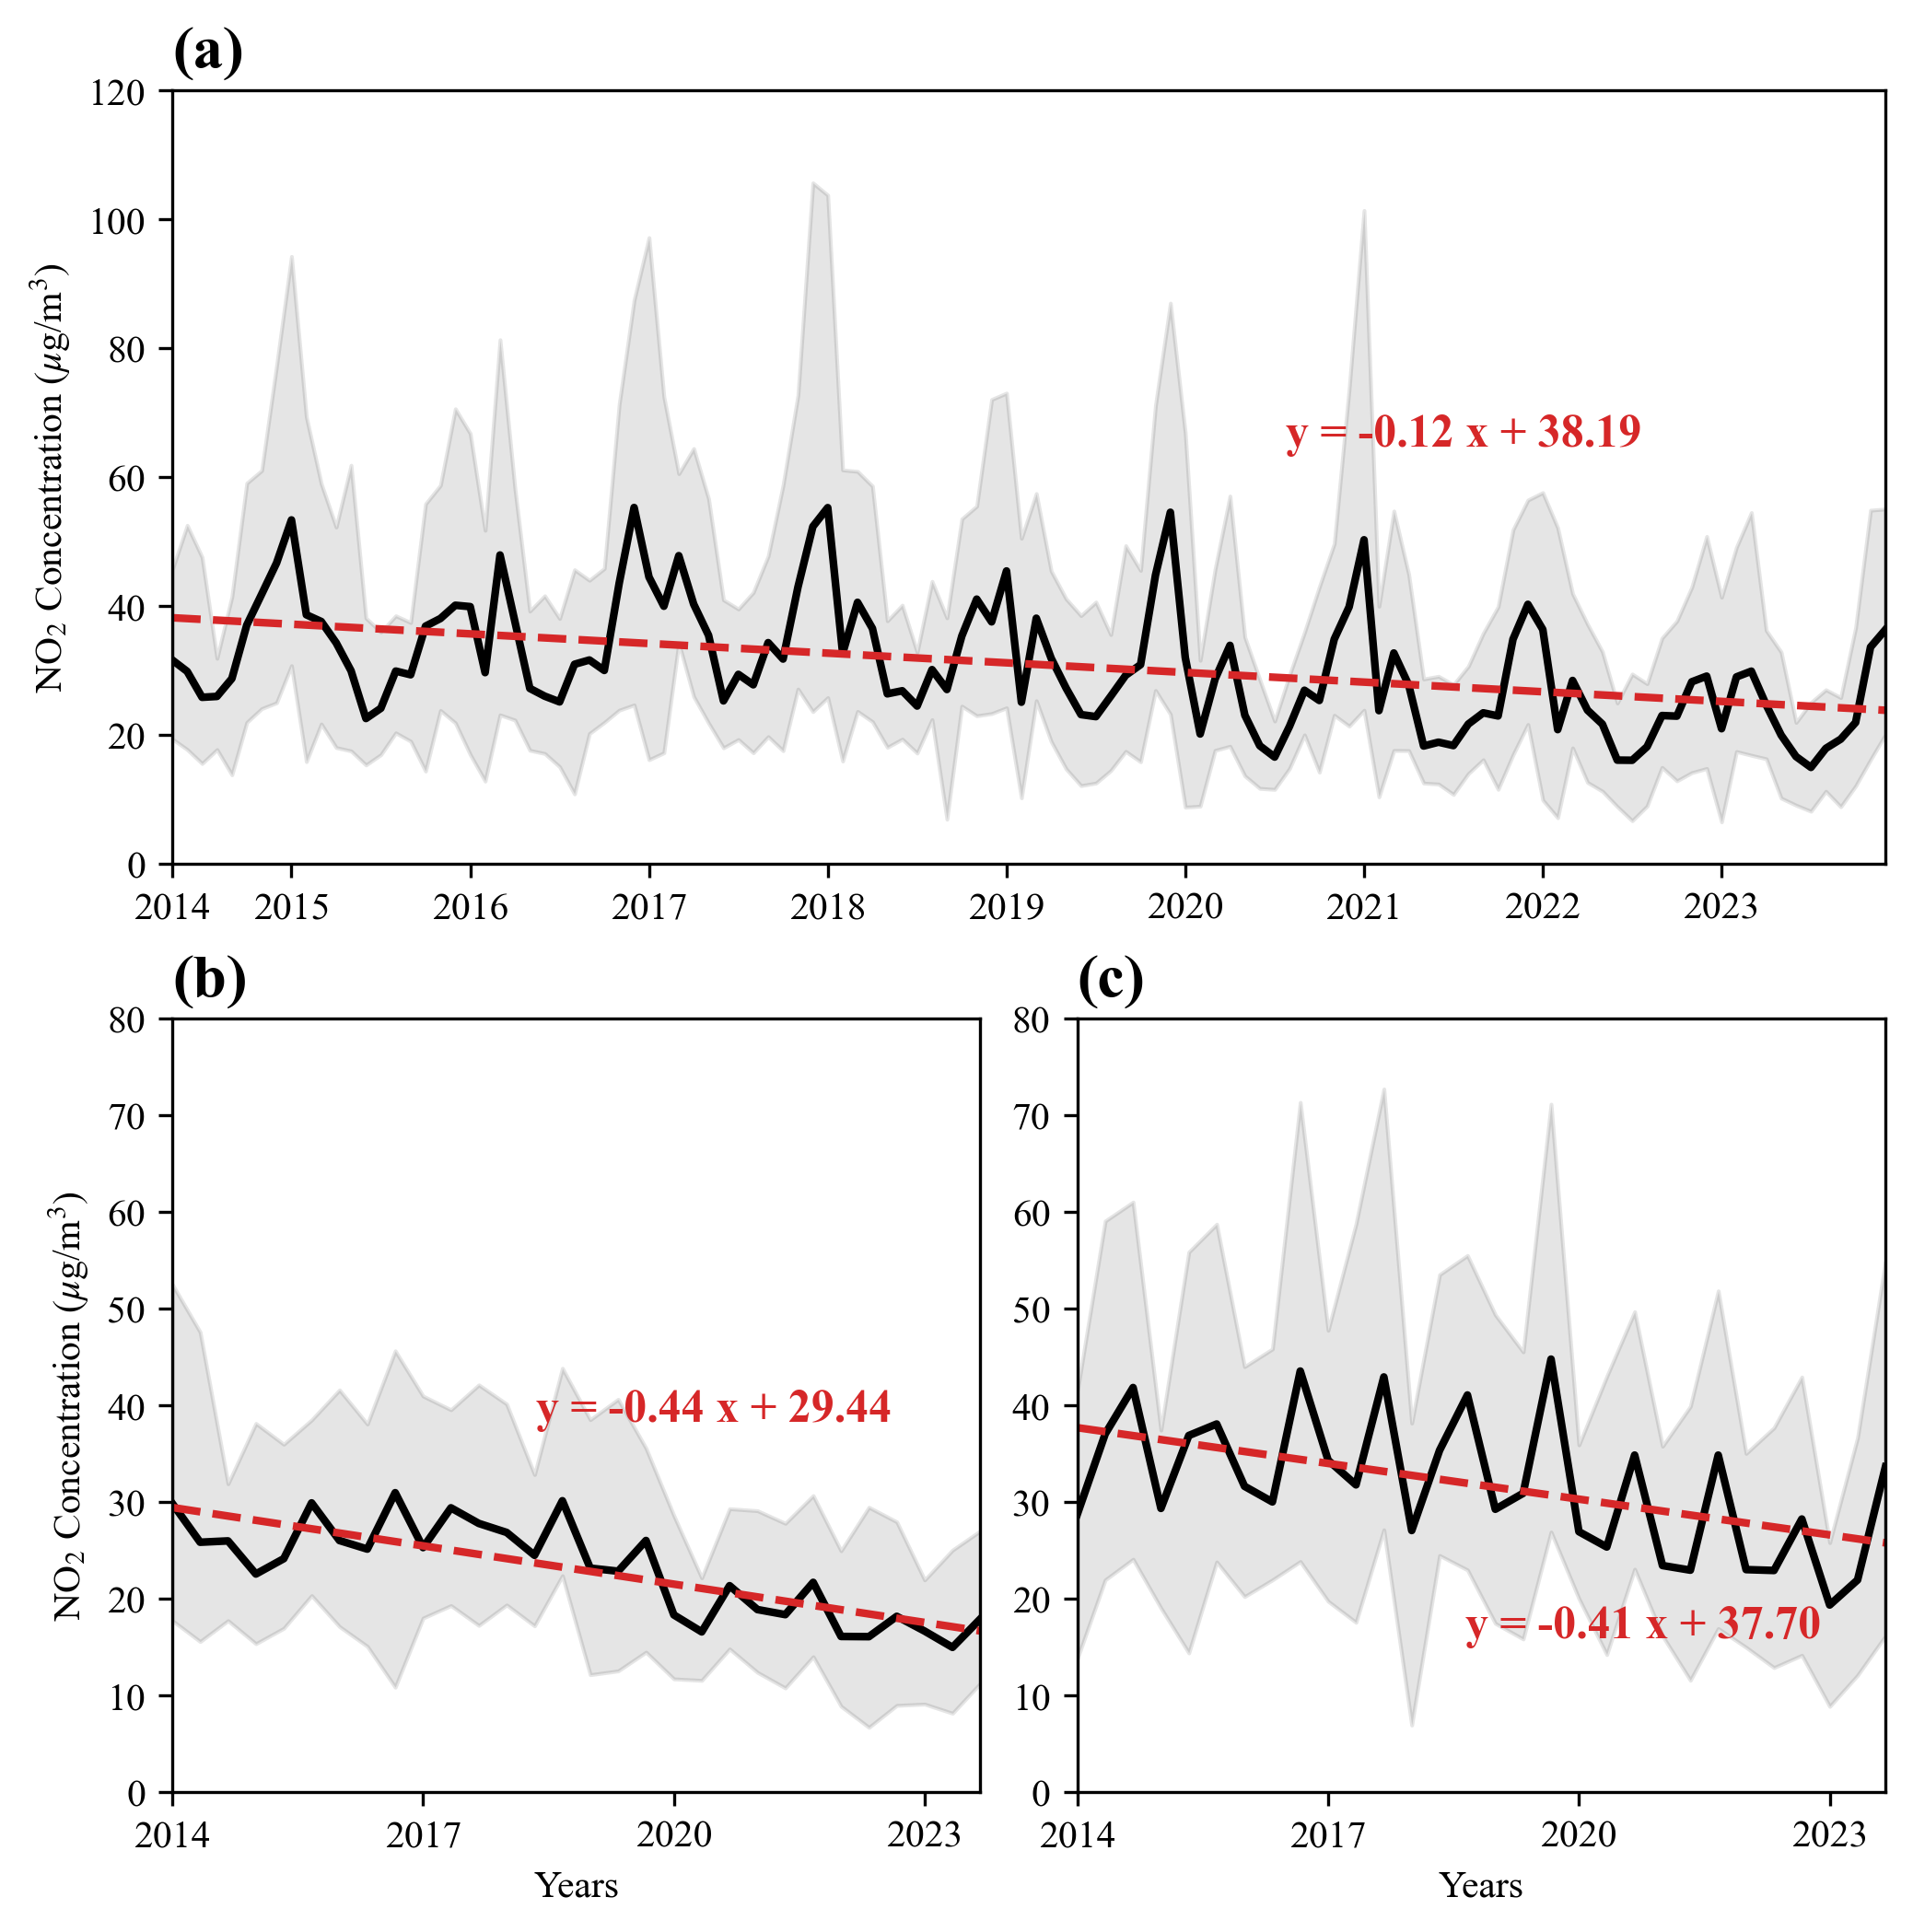

In [19]:
textdict = {'weight': 'bold', 'size': 16,}

fig = plt.figure(figsize=(8, 8),dpi=300)

# =======
#   (a) 
# =======
ax1 = plt.subplot(2,1,1)

monthnum = len(pd.date_range(df.index[0],df.index[-1],freq='M'))+1
months = np.arange(0,monthnum)

ax1.plot(months,monthly,label='Monthly',color='k',linewidth=2)
ax1.fill_between(months,month_min,month_max,alpha=0.1,color='k')

ax1.plot(months,months*slope+intercept,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax1.text(x=0.65,y=0.54,s=f'y = {slope:.2f} x + {intercept:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax1.transAxes)

ax1.set_xticks(np.array([0,8,20,32,44,56,68,80,92,104,]))
ax1.set_xticklabels(pd.date_range('2014','2024',freq='Y').strftime('%Y'),rotation=0)

ax1.set_xlim(0,monthnum-1)
ax1.set_ylim(0,120)
# ax1.set_xlabel('Years')
ax1.set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax1.set_title('(a)',loc='left',**textdict)


# =============
#   (b) & (c)
# =============
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

# ============ Summer ===============
ax2.plot(seasons,summer,label='summer',color='k',linewidth=2)
ax2.fill_between(seasons,summer_min,summer_max,alpha=0.1,color='k')

ax2.set_xticks(np.arange(0,seasonnum,3*3))
ax2.set_xticklabels(pd.date_range('2014','2024',freq='3Y').strftime('%Y'),rotation=0)

ax2.plot(seasons,seasons*slope1+intercept1,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax2.text(x=0.45,y=0.48,s=f'y = {slope1:.2f} x + {intercept1:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax2.transAxes)

ax2.set_xlim(0,seasonnum-1)
ax2.set_ylim(0,80)
ax2.set_xlabel('Years')
ax2.set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax2.set_title('(b)',loc='left',**textdict)

# ============ Autumn ===============
ax3.plot(seasons,autumn,label='autumn',color='k',linewidth=2)
ax3.fill_between(seasons,autumn_min,autumn_max,alpha=0.1,color='k')

ax3.plot(seasons,seasons*slope2+intercept2,label='Trend',color='tab:red',linestyle='--',linewidth=2)
ax3.text(x=0.48,y=0.2,s=f'y = {slope2:.2f} x + {intercept2:.2f}',
        color='tab:red',fontweight='bold',fontsize=12,transform=ax3.transAxes)

ax3.set_xticks(np.arange(0,seasonnum,3*3))
ax3.set_xticklabels(pd.date_range('2014','2024',freq='3Y').strftime('%Y'),rotation=0)

ax3.set_xlim(0,seasonnum-1)
ax3.set_ylim(0,80)
ax3.set_xlabel('Years')
# ax3.set_ylabel('NO$_2$ Concentration ($\mu$g/m$^3$)')
ax3.set_title('(c)',loc='left',**textdict)

plt.subplots_adjust(wspace=0.12,)
plt.show()